# 1. Setup

Phần này chuẩn bị môi trường làm việc cho notebook:

- Import các thư viện cần thiết cho xử lý dữ liệu và trực quan hóa.
- Thiết lập một số tùy chọn hiển thị để dễ quan sát dữ liệu.
- Nạp dataset **Taiwan Air Quality Index Data 2016–2024** từ file CSV.

> Lưu ý: Phần Setup chỉ nhằm khởi tạo môi trường, không đi sâu giải thích hay phân tích.

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from ipywidgets import HBox, Output

In [3]:
csv_path = "/home/quan3110/air_quality.csv"
df = pd.read_csv(csv_path, low_memory=False)

# 2. Data Collection

## 2.1 Dữ liệu liên quan đến chủ đề gì?

Dataset này ghi nhận **chỉ số chất lượng không khí (AQI)** và **nồng độ các chất ô nhiễm chính**
theo **trạm quan trắc** tại **Đài Loan** trong giai đoạn **2016–2024**.

Các biến đo lường gồm:
- Chỉ số tổng hợp: `aqi`, `status`, `pollutant` (chất ô nhiễm chi phối).
- Các chất ô nhiễm chính: `so2`, `co`, `o3`, `pm10`, `pm2.5`, `no2`, `nox`, `no`.
- Các biến tổng hợp theo chuẩn AQI: `o3_8hr`, `co_8hr`, `pm2.5_avg`, `pm10_avg`, `so2_avg`.
- Điều kiện gió: `windspeed`, `winddirec`.
- Thông tin không gian: `sitename`, `county`, `longitude`, `latitude`, `siteid`.

Bối cảnh thực tế:
Dữ liệu AQI phản ánh mức độ rủi ro sức khỏe từ ô nhiễm không khí, hỗ trợ ra quyết định trong
cảnh báo y tế cộng đồng, quản lý môi trường, và hoạch định chính sách ở cấp thành phố/quận/huyện.

---

## 2.2 Nguồn dữ liệu là gì?

- **Platform**: Kaggle  
- **Dataset**: *Taiwan Air Quality Index Data 2016~2024*  
- **URL**: https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024  
- Dataset trên Kaggle nhiều khả năng được tổng hợp từ **dữ liệu mở của Bộ Môi trường Đài Loan**
(Ministry of Environment), thuộc nhóm dữ liệu AQI theo trạm quan trắc với tần suất cập nhật theo giờ.

---

## 2.3 Dữ liệu này có được cấp phép sử dụng không?

Theo trang dataset trên Kaggle, bộ dữ liệu được cung cấp theo **CC0: Public Domain**,
cho phép sử dụng lại cho mục đích học tập và nghiên cứu.  

Nguồn dữ liệu mở của chính phủ Đài Loan cũng áp dụng **Open Government Data License, version 1.0**,
với quyền sử dụng rộng rãi và yêu cầu tuân thủ quy định trích dẫn nguồn khi cần.  

Nhóm sẽ:
- Trích dẫn tác giả/dataset Kaggle.
- Ghi rõ nguồn gốc dữ liệu từ nền tảng dữ liệu mở của Bộ Môi trường Đài Loan trong phần References.

---

## 2.4 Dữ liệu này được thu thập như thế nào?

Dữ liệu được thu thập thông qua **hệ thống trạm quan trắc chất lượng không khí** của Đài Loan.
Các trạm đo ghi nhận nồng độ các chất ô nhiễm và các thông số liên quan,
sau đó AQI được tính toán dựa trên chuẩn chỉ số AQI theo các chất chính.  

- **Collection method**: Cảm biến/monitoring stations (quan trắc môi trường).
- **Target population**: Các khu vực/đô thị có trạm quan trắc trên toàn Đài Loan.
- **Time period**: 2016–2024 (theo dữ liệu mà nhóm sử dụng).
- **Tần suất**: Dữ liệu AQI theo trạm có thể được cập nhật **theo giờ** trong nền tảng dữ liệu gốc. 

Hạn chế/bias tiềm năng:
- Mức độ phủ trạm có thể không đồng đều giữa các khu vực,
dẫn đến thiên lệch về đô thị lớn.
- Một số chất ô nhiễm hoặc thời điểm có thể thiếu dữ liệu do hỏng thiết bị,
bảo trì, hoặc thay đổi chuẩn đo.

---

## 2.5 Tại sao chọn tập dữ liệu này?

Nhóm chọn dataset này vì:

1. **Tính thực tiễn cao**: Ô nhiễm không khí ảnh hưởng trực tiếp đến sức khỏe cộng đồng
và là vấn đề nổi bật tại nhiều đô thị châu Á.

2. **Độ phong phú về biến**:
Dataset cung cấp nhiều chất ô nhiễm, biến tổng hợp theo chuẩn AQI,
kèm yếu tố gió và thông tin địa lý, phù hợp cho phân tích đa biến.

3. **Tiềm năng câu hỏi nghiên cứu đa dạng**:
- Biến động AQI theo thời gian (theo giờ, theo mùa, theo năm).
- So sánh sự khác biệt AQI giữa các `county`/trạm.
- Xác định chất ô nhiễm chi phối theo vùng và thời điểm.
- Xây dựng mô hình dự đoán `aqi` hoặc phân loại `status`
từ các chất ô nhiễm và yếu tố khí tượng.


# 3. Data Exploration

## 3.1 Dataset Overview

In [5]:
print("--- Xem trước (5 hàng đầu tiên) ---")
display(df.head())

print("\n--- Kích thước tập dữ liệu ---")
num_rows, num_cols = df.shape
print(f"Số hàng: {num_rows}")
print(f"Số cột: {num_cols}")

--- Xem trước (5 hàng đầu tiên) ---


,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,...,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,...,2.3,225,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,...,1.1,184,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,...,0.4,210,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.2,30.0,35.9,...,1.9,239,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,...,1.8,259,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0



--- Kích thước tập dữ liệu ---
Số hàng: 5882208
Số cột: 25


### Quy mô và cấu trúc
Dataset **Taiwan Air Quality Index Data 2016–2024** có **5,882,208 hàng** và **25 cột**.

Nhìn vào 5 hàng đầu tiên, các cột mô tả:
- **Thời gian đo**: `date`
- **Vị trí trạm**: `sitename`, `county`, `longitude`, `latitude`, `siteid`
- **Chỉ số tổng hợp**: `aqi`, `status`, `pollutant`
- **Các chất ô nhiễm**: `so2`, `co`, `o3`, `pm10`, `pm2.5`, `no2`, `nox`, `no`
- **Biến tổng hợp theo chuẩn AQI**: `o3_8hr`, `co_8hr`, `pm2.5_avg`, `pm10_avg`, `so2_avg`
- **Điều kiện gió**: `windspeed`, `winddirec`
- Một cột ít rõ ý nghĩa trong bản dữ liệu hiện tại: `unit`

Với định dạng thời gian hiển thị ở mẫu dữ liệu (`YYYY-MM-DD HH:00`), mỗi hàng nhiều khả năng đại diện cho:
**một lần quan trắc AQI và nồng độ các chất ô nhiễm tại một trạm vào một thời điểm**,
phù hợp với dữ liệu quan trắc có tần suất theo giờ.

In [6]:
print("\n--- Kiểu dữ liệu cột ---")
print(df.dtypes)


--- Kiểu dữ liệu cột ---
date          object
sitename      object
county        object
aqi          float64
pollutant     object
status        object
so2           object
co            object
o3            object
o3_8hr        object
pm10          object
pm2.5         object
no2           object
nox           object
no            object
windspeed     object
winddirec     object
unit         float64
co_8hr        object
pm2.5_avg     object
pm10_avg      object
so2_avg       object
longitude    float64
latitude     float64
siteid       float64
dtype: object


### Kiểu dữ liệu ban đầu
Kết quả cho thấy:
- Có **5 cột kiểu `float64`** và **20 cột kiểu `object`**.
- Các cột đáng ra là số như `pm2.5`, `pm10`, `so2`, `co`, `o3`, `no2`, `windspeed`, `winddirec`,...
đang được đọc dưới dạng `object`.

Điều này gợi ý khả năng tồn tại các ký hiệu không phải số (ví dụ `'-'`) dùng để đánh dấu
thiếu dữ liệu hoặc lỗi thiết bị. Chúng ta sẽ xác nhận kỹ hơn ở mục **3.3 Column Inventory & Data Types**
và xử lý trong notebook preprocessing.

In [7]:
print("\n--- Phạm vi Thời gian (kiểm tra nhẹ) ---")

# Tạo chuỗi ngày giờ tạm thời mà không sửa đổi df
date_tmp = pd.to_datetime(df["date"], errors="coerce")

print("Tỷ lệ thành công của ngày giờ đã phân tích cú pháp:")
print(f" Ngày giờ hợp lệ: {date_tmp.notna().sum():,}")
print(f" Không hợp lệ/NaT: {date_tmp.isna().sum():,}")

print("\nPhạm vi thời gian (dựa trên các giá trị có thể phân tích cú pháp):")
print(" Min:", date_tmp.min())
print(" Max:", date_tmp.max())


--- Phạm vi Thời gian (kiểm tra nhẹ) ---
Tỷ lệ thành công của ngày giờ đã phân tích cú pháp:
 Ngày giờ hợp lệ: 5,882,123
 Không hợp lệ/NaT: 85

Phạm vi thời gian (dựa trên các giá trị có thể phân tích cú pháp):
 Min: 2016-11-25 13:00:00
 Max: 2024-08-31 23:00:00


### Phạm vi thời gian
Chúng ta thực hiện kiểm tra nhẹ bằng cách chuyển đổi tạm thời cột `date` sang `datetime`
mà không thay đổi dữ liệu gốc.

Kết quả:
- **5,882,123** giá trị thời gian chuyển đổi hợp lệ.
- **85** giá trị không hợp lệ (`NaT`), chiếm tỷ lệ rất nhỏ so với tổng số dòng.

Phạm vi thời gian quan trắc (dựa trên các giá trị parse được):
- **Từ 2016-11-25 13:00 đến 2024-08-31 23:00**.

Các trường hợp định dạng thời gian khác biệt sẽ được ghi nhận như một vấn đề dữ liệu nhỏ
và quyết định xử lý sẽ để trong phần preprocessing.

In [8]:
print("\n--- Phạm vi không gian ---")

if "county" in df.columns:
    print(f"Number of counties: {df['county'].nunique():,}")
    print("Top 10 counties by record count:")
    display(df["county"].value_counts().head(10))

if "sitename" in df.columns:
    print(f"\nNumber of sitenames (stations): {df['sitename'].nunique():,}")
    print("Top 10 sitenames by record count:")
    display(df["sitename"].value_counts().head(10))

if "siteid" in df.columns:
    print(f"\nNumber of siteid: {df['siteid'].nunique():,}")


--- Phạm vi không gian ---
Number of counties: 22
Top 10 counties by record count:


county
New Taipei City    898819
Kaohsiung City     888497
Taipei City        503766
Taoyuan City       448718
Taichung City      367033
Tainan City        366827
Pingtung County    305495
Changhua County    293423
Yunlin County      287491
Miaoli County      219683
Name: count, dtype: int64


Number of sitenames (stations): 123
Top 10 sitenames by record count:


sitename
Yangming     72180
Tamsui       72173
Shilin       71944
Zhongshan    71943
Dayuan       71942
Pingzhen     71935
Datong       71934
Hsinchu      71932
Wanli        71928
Zhudong      71928
Name: count, dtype: int64


Number of siteid: 98


### Phạm vi không gian
Dataset bao phủ:
- **22 `county`**.
- **123 `sitename`** (tên trạm).
- **98 `siteid`**.

Số lượng bản ghi không phân bố đều giữa các địa phương.
Các khu vực có số dòng quan trắc lớn nhất gồm:
**New Taipei City**, **Kaohsiung City**, **Taipei City**, **Taoyuan City**,...

Điều này cho thấy dữ liệu có độ phủ rộng theo không gian,
nhưng cũng gợi ý khả năng **thiên lệch về mật độ quan trắc** giữa các vùng,
đây là một điểm cần lưu ý khi so sánh hoặc xây dựng mô hình sau này.

Tóm lại, dataset có quy mô lớn, giàu biến đo lường và thông tin không gian-thời gian,
đáp ứng tốt yêu cầu phân tích thống kê, trực quan hóa và xây dựng mô hình dự đoán AQI.
Các vấn đề sơ bộ về kiểu dữ liệu và một lượng rất nhỏ định dạng thời gian không đồng nhất
sẽ được phân tích kỹ trong các mục tiếp theo.

## 3.2 Data Integrity

Trong mục này, chúng tôi kiểm tra tính toàn vẹn dữ liệu ở mức hàng (row-level integrity),
tập trung vào hai vấn đề chính: **dữ liệu trùng lặp** và **các dòng hoàn toàn rỗng**.

In [9]:
print("--- Data Integrity Checks ---")
total_rows = len(df)

# 1) Duplicates
dup_count = df.duplicated().sum()
# 2) Rows that are entirely NaN
all_nan_count = df.isna().all(axis=1).sum()
# Summary table
integrity_summary = pd.DataFrame({
    "Check": ["Duplicated rows", "All-NaN rows"],
    "Count": [dup_count, all_nan_count],
})

integrity_summary["Percent (%)"] = (integrity_summary["Count"] / total_rows * 100).round(6)

print(f"Total rows: {total_rows:,}")
display(integrity_summary)

--- Data Integrity Checks ---
Total rows: 5,882,208


,Check,Count,Percent (%)
0,Duplicated rows,0,0.0
1,All-NaN rows,0,0.0


### Dòng hoàn toàn rỗng (All-NaN rows)
Kết quả kiểm tra cho thấy **không phát hiện dòng nào có toàn bộ giá trị là NaN**.
Điều này cho thấy dữ liệu không chứa các bản ghi “rỗng hoàn toàn” do lỗi xuất/ghép file,
giúp giảm rủi ro nhiễu trong các bước thống kê và mô hình hóa sau này.

### Dữ liệu trùng lặp (Duplicate rows)
Kết quả kiểm tra số dòng trùng lặp đã được báo cáo ở bảng tóm tắt của cell trước.
Về nguyên tắc, các dòng bị trùng lặp hoàn toàn có thể làm sai lệch các thống kê
(tần suất, trung bình, phân phối) cũng như ảnh hưởng đến quá trình huấn luyện mô hình.

**Quyết định xử lý:**  
Chúng tôi **chưa loại bỏ duplicates trong notebook 01** để đảm bảo phần này đúng vai trò
Data Exploration. Việc loại bỏ trùng lặp sẽ được thực hiện trong **notebook preprocessing**
ở giai đoạn phân tích sau.

# 3.3 Column Inventory & Data Types

Mục tiêu của phần này là: 
- (1) mô tả ý nghĩa các cột theo nhóm thông tin
- (2) kiểm tra tính hợp lý của kiểu dữ liệu ban đầu để phát hiện các vấn đề cần xử lý ở giai đoạn preprocessing.

In [10]:
col_groups = {
    "Time/Location": ["date", "sitename", "county", "longitude", "latitude", "siteid"],
    "AQI": ["aqi", "status", "pollutant"],
    "Pollutants": ["so2", "co", "o3", "pm10", "pm2.5", "no2", "nox", "no"],
    "Aggregates": ["o3_8hr", "co_8hr", "pm2.5_avg", "pm10_avg", "so2_avg"],
    "Wind": ["windspeed", "winddirec"],
    "Suspicious/Other": ["unit"]
}

print("--- Column group presence check ---")
for group_name, cols in col_groups.items():
    present = [c for c in cols if c in df.columns]
    missing = [c for c in cols if c not in df.columns]
    print(f"\n{group_name}:")
    print("  Present :", present)
    if missing:
        print("  Missing :", missing)

--- Column group presence check ---

Time/Location:
  Present : ['date', 'sitename', 'county', 'longitude', 'latitude', 'siteid']

AQI:
  Present : ['aqi', 'status', 'pollutant']

Pollutants:
  Present : ['so2', 'co', 'o3', 'pm10', 'pm2.5', 'no2', 'nox', 'no']

Aggregates:
  Present : ['o3_8hr', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg']

Wind:
  Present : ['windspeed', 'winddirec']

Suspicious/Other:
  Present : ['unit']


### Mini data dictionary (nhóm cột)

Dựa trên mô tả dataset và kiểm tra sự hiện diện của các cột, bộ dữ liệu bao gồm đầy đủ
các nhóm thông tin sau:

- **Thời gian/địa điểm**:  `date`, `sitename`, `county`, `longitude`, `latitude`, `siteid`  
  → mô tả thời điểm quan trắc và định danh/định vị trạm đo.

- **AQI**:    `aqi`, `status`, `pollutant`  
  → `aqi` là chỉ số chất lượng không khí tổng hợp;  
  `status` thể hiện mức độ (Good/Moderate/...);  
  `pollutant` là chất ô nhiễm chi phối AQI tại thời điểm đó.

- **Các chất ô nhiễm chính**:  `so2`, `co`, `o3`, `pm10`, `pm2.5`, `no2`, `nox`, `no`.

- **Biến tổng hợp theo chuẩn AQI**:  `o3_8hr`, `co_8hr`, `pm2.5_avg`, `pm10_avg`, `so2_avg`.

- **Điều kiện gió**:  `windspeed`, `winddirec`.

- **Cột nghi vấn**:  `unit`  
  → cần kiểm tra kỹ mức độ hữu ích và tỷ lệ thiếu ở các mục sau.

### Kiểm tra kiểu dữ liệu ban đầu

In [11]:
def display_side_by_side(dfs, titles=None):
    html = ""
    if titles is None:
        titles = [""] * len(dfs)
    for df_i, title in zip(dfs, titles):
        html += f"<div style='flex:1; padding: 0 8px;'>"
        if title:
            html += f"<h4 style='margin: 0 0 8px 0;'>{title}</h4>"
        html += df_i.to_html()
        html += "</div>"
    display(HTML(f"<div style='display:flex; align-items:flex-start;'>{html}</div>"))

print("\n--- Column Data Types (split view) ---")

dtypes_series = df.dtypes.sort_index()
mid = len(dtypes_series) // 2

dtypes_left = dtypes_series.iloc[:mid].to_frame("dtype")
dtypes_right = dtypes_series.iloc[mid:].to_frame("dtype")

display_side_by_side([dtypes_left, dtypes_right], titles=["Part 1", "Part 2"])


--- Column Data Types (split view) ---


,dtype
aqi,float64
co,object
co_8hr,object
county,object
date,object
latitude,float64
longitude,float64
no,object
no2,object
nox,object


In [12]:
expected_numeric = [
    "aqi", "so2", "co", "o3", "o3_8hr", "pm10", "pm2.5",
    "no2", "nox", "no", "windspeed", "winddirec",
    "co_8hr", "pm2.5_avg", "pm10_avg", "so2_avg",
    "longitude", "latitude", "siteid"
]

expected_numeric = [c for c in expected_numeric if c in df.columns]

current_object_numeric = [c for c in expected_numeric if df[c].dtype == "object"]
current_ok_numeric = [c for c in expected_numeric if df[c].dtype != "object"]

summary_dtype_issue = pd.DataFrame({
    "Group": ["Expected numeric but object", "Expected numeric and not object"],
    "Count": [len(current_object_numeric), len(current_ok_numeric)],
    "Columns": [", ".join(current_object_numeric), ", ".join(current_ok_numeric)]
})

print("\n--- Expected numeric type check ---")
display(summary_dtype_issue)


--- Expected numeric type check ---


,Group,Count,Columns
0,Expected numeric but object,15,"so2, co, o3, o3_8hr, pm10, pm2.5, no2, nox, no..."
1,Expected numeric and not object,4,"aqi, longitude, latitude, siteid"


Kết quả cho thấy:

- Các cột **đã đúng kiểu số** ngay từ đầu gồm:  
  `aqi`, `longitude`, `latitude`, `siteid` (kiểu `float64`).

- Tuy nhiên, theo kiểm tra “Expected numeric type check”, có tới  
  **15 cột đáng ra phải là số nhưng đang bị đọc là `object`**, bao gồm hầu hết:
  các chất ô nhiễm, biến tổng hợp và dữ liệu gió.

Điều này là một dấu hiệu rõ ràng cho thấy dữ liệu đang chứa các ký hiệu không phải số,
khiến Pandas không thể tự nhận diện đúng kiểu.

In [13]:
print("\n--- Strange values check for expected numeric columns ---")

cols_to_check = [
    'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5',
    'no2', 'nox', 'no', 'windspeed', 'winddirec',
    'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg'
]

cols_to_check = [c for c in cols_to_check if c in df.columns]

results = []

for col in cols_to_check:
    numeric_vals = pd.to_numeric(df[col], errors='coerce')
    strange_mask = numeric_vals.isna() & df[col].notna()

    strange_values = df.loc[strange_mask, col].unique()
    strange_values = [v for v in strange_values if str(v).strip() != ""]

    results.append({
        "column": col,
        "dtype_now": str(df[col].dtype),
        "num_strange_types": len(strange_values),
        "sample_strange_values": ", ".join(map(str, strange_values[:5])) if len(strange_values) > 0 else ""
    })

strange_report = pd.DataFrame(results).sort_values(
    by=["num_strange_types", "column"], ascending=[False, True]
)

display(strange_report)


--- Strange values check for expected numeric columns ---


,column,dtype_now,num_strange_types,sample_strange_values
5,pm2.5,object,2,"-, ND"
1,co,object,1,-
11,co_8hr,object,1,-
8,no,object,1,-
6,no2,object,1,-
7,nox,object,1,-
2,o3,object,1,-
3,o3_8hr,object,1,-
4,pm10,object,1,-
13,pm10_avg,object,1,-


### Kiểm tra giá trị lạ (strange values)

Bảng “Strange values check” xác nhận giả thuyết trên:

- **`pm2.5`** xuất hiện **2 loại giá trị lạ**: `'-'` và `ND`.
- Hầu hết các cột còn lại xuất hiện giá trị lạ chủ yếu là **`'-'`**.

Diễn giải hợp lý:
- Dấu **`'-'`** nhiều khả năng được dùng để đánh dấu **thiếu dữ liệu / lỗi quan trắc**.
- Ký hiệu **`ND`** (ở `pm2.5`) có thể là viết tắt của *Not Detected* (không phát hiện),
và về mặt phân tích thường cũng nên được quy về dạng “thiếu/không đo được”
để thống nhất xử lý.

### Kết luận và kế hoạch xử lý

Tóm lại, bộ dữ liệu có cấu trúc cột đầy đủ và phù hợp với bối cảnh quan trắc AQI.
Tuy nhiên, **nhiều biến số đo lường quan trọng đang bị đọc sai kiểu dữ liệu**
do sự xuất hiện của các ký hiệu chuỗi như `'-'` (và `ND` ở `pm2.5`).

**Kế hoạch (thực hiện ở notebook preprocessing):**
1. Chuẩn hóa các ký hiệu không phải số (ít nhất gồm `'-'`, và cân nhắc `ND`)
   về `NaN`.
2. Ép kiểu các cột ô nhiễm, biến tổng hợp và gió sang dạng số bằng
   `pd.to_numeric(..., errors='coerce')`.
3. Kiểm tra lại tỷ lệ missing sau chuẩn hóa để quyết định chiến lược xử lý tiếp theo.
4. Đánh giá vai trò của cột `unit` (nếu thiếu quá nhiều hoặc không mang ý nghĩa phân tích)
   để quyết định giữ hay loại bỏ sau.

# 3.4 Numerical Columns Analysis

Mục tiêu của phần này là khảo sát đặc điểm thống kê và phân phối của các biến số đo định lượng,
nhằm phát hiện:
- thang đo và mức độ biến thiên,
- phân phối lệch/đuôi dài,
- outliers,
- các giá trị bất khả hoặc dấu hiệu *sentinel values*.

Lưu ý: Để phục vụ EDA an toàn, chúng tôi tạo bản tạm `df_num` và ép kiểu bằng
`pd.to_numeric(..., errors='coerce')` **chỉ để thống kê/plot**,
không xem đây là bước preprocessing cuối cùng.

### 3.4.1. Thống kê mô tả (Central tendency & range)

In [14]:
num_cols = [
    "aqi", "pm2.5", "pm10", "o3", "no2", "so2", "co", "windspeed",
    "o3_8hr", "co_8hr", "pm2.5_avg", "pm10_avg", "so2_avg",
    "nox", "no", "winddirec"
]

num_cols = [c for c in num_cols if c in df.columns]

print("--- Numeric columns selected ---")
print(num_cols)

# Create a temporary numeric-only copy for EDA
df_num = df.copy()

for col in num_cols:
    df_num[col] = pd.to_numeric(df_num[col], errors="coerce")

print("\n--- Dtypes after temporary conversion (df_num) ---")
print(df_num[num_cols].dtypes)

--- Numeric columns selected ---
['aqi', 'pm2.5', 'pm10', 'o3', 'no2', 'so2', 'co', 'windspeed', 'o3_8hr', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'nox', 'no', 'winddirec']

--- Dtypes after temporary conversion (df_num) ---
aqi          float64
pm2.5        float64
pm10         float64
o3           float64
no2          float64
so2          float64
co           float64
windspeed    float64
o3_8hr       float64
co_8hr       float64
pm2.5_avg    float64
pm10_avg     float64
so2_avg      float64
nox          float64
no           float64
winddirec    float64
dtype: object


### Summary statistics

In [15]:
display(df_num[num_cols].describe())

# Quick mean/median table for key variables
key_cols = [c for c in ["aqi", "pm2.5", "pm10", "o3", "no2", "so2", "co", "windspeed"] if c in df_num.columns]

central_tendency = pd.DataFrame({
    "mean": df_num[key_cols].mean(),
    "median": df_num[key_cols].median(),
    "std": df_num[key_cols].std(),
    "min": df_num[key_cols].min(),
    "max": df_num[key_cols].max()
}).round(4)

print("\n--- Central tendency & range (key numeric cols) ---")
display(central_tendency)

,aqi,pm2.5,pm10,o3,no2,so2,co,windspeed,o3_8hr,co_8hr,pm2.5_avg,pm10_avg,so2_avg,nox,no,winddirec
count,5.839188e+06,5.679983e+06,5.735555e+06,5.674782e+06,5.716208e+06,5.742417e+06,5.728077e+06,5.579525e+06,5.728560e+06,5.778655e+06,5.802244e+06,5.786038e+06,5.253023e+06,5.713061e+06,5.712730e+06,5.579287e+06
mean,5.419277e+01,1.684545e+01,3.438227e+01,3.042044e+01,1.125193e+01,1.994126e+00,3.386322e-01,2.214170e+00,3.034839e+01,3.186695e-01,1.666025e+01,3.416179e+01,1.647508e+00,1.471644e+01,3.451216e+00,1.640792e+02
std,2.985864e+01,1.271984e+01,2.429474e+01,1.835347e+01,8.678853e+00,1.875789e+00,1.207092e+00,1.693803e+00,1.585036e+01,2.283210e-01,1.156664e+01,2.208988e+01,1.291949e+00,1.488288e+01,8.357343e+00,1.149409e+02
min,-1.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,-2.778000e+01,-9.990000e+02,-9.990000e+02,-4.000000e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.600000e+00,-7.200000e+00,0.000000e+00
25%,3.200000e+01,8.000000e+00,1.800000e+01,1.600000e+01,5.000000e+00,1.000000e+00,1.900000e-01,1.100000e+00,1.800000e+01,2.000000e-01,8.000000e+00,1.800000e+01,1.000000e+00,6.200000e+00,7.000000e-01,5.500000e+01
50%,4.600000e+01,1.400000e+01,2.800000e+01,2.830000e+01,9.000000e+00,1.700000e+00,2.900000e-01,1.800000e+00,2.900000e+01,3.000000e-01,1.400000e+01,2.900000e+01,1.000000e+00,1.080000e+01,1.400000e+00,1.510000e+02
75%,7.000000e+01,2.300000e+01,4.500000e+01,4.200000e+01,1.500000e+01,2.500000e+00,4.100000e-01,2.900000e+00,4.100000e+01,4.000000e-01,2.200000e+01,4.500000e+01,2.000000e+00,1.800000e+01,2.700000e+00,2.710000e+02
max,5.000000e+02,1.000000e+03,1.407000e+03,4.100000e+02,3.510500e+02,2.554000e+02,3.858000e+01,4.100000e+01,1.358000e+02,2.600000e+01,2.450000e+02,7.650000e+02,6.000000e+01,4.310000e+02,3.913100e+02,9.900000e+02



--- Central tendency & range (key numeric cols) ---


,mean,median,std,min,max
aqi,54.1928,46.00,29.8586,-1.00,500.00
pm2.5,16.8454,14.00,12.7198,-999.00,1000.00
pm10,34.3823,28.00,24.2947,-999.00,1407.00
o3,30.4204,28.30,18.3535,-999.00,410.00
no2,11.2519,9.00,8.6789,-27.78,351.05
so2,1.9941,1.70,1.8758,-999.00,255.40
co,0.3386,0.29,1.2071,-999.00,38.58
windspeed,2.2142,1.80,1.6938,-0.40,41.00


Kết quả tổng hợp cho các biến quan trọng:

- **AQI**:  
  Mean = **54.19**, Median = **46.00**, Std = **29.86**,  
  Min = **-1**, Max = **500**.

- **PM2.5**:  
  Mean = **16.85**, Median = **14.00**, Std = **12.72**,  
  Min = **-999**, Max = **1000**.

- **PM10**:  
  Mean = **34.38**, Median = **28.00**, Std = **24.29**,  
  Min = **-999**, Max = **1407**.

- **O₃**:  
  Mean = **30.42**, Median = **28.30**, Std = **18.35**,  
  Min = **-999**, Max = **410**.

- **NO₂**:  
  Mean = **11.25**, Median = **9.00**, Std = **8.68**,  
  Min = **-27.78**, Max = **351.05**.

- **SO₂**:  
  Mean = **1.99**, Median = **1.70**, Std = **1.88**,  
  Min = **-999**, Max = **255.40**.

- **CO**:  
  Mean = **0.3386**, Median = **0.29**, Std = **1.21**,  
  Min = **-999**, Max = **38.58**.

- **Windspeed**:  
  Mean = **2.21**, Median = **1.80**, Std = **1.69**,  
  Min = **-0.40**, Max = **41.00**.

Nhìn chung, **mean > median** ở hầu hết biến chính (AQI, PM2.5, PM10, ...)
gợi ý phân phối **lệch phải** với đuôi dài.

### 3.4.2. Giá trị âm và dấu hiệu sentinel

In [16]:
neg_report = []
for col in key_cols:
    neg_count = (df_num[col] < 0).sum()
    neg_report.append({
        "column": col,
        "negative_count": int(neg_count),
        "negative_percent (%)": round(neg_count / len(df_num) * 100, 6) if len(df_num) > 0 else 0.0,
        "min_value": df_num[col].min()
    })

neg_report_df = pd.DataFrame(neg_report).sort_values("negative_count", ascending=False)
display(neg_report_df)

,column,negative_count,negative_percent (%),min_value
5,so2,8028,0.136479,-999.00
0,aqi,7391,0.125650,-1.00
4,no2,1029,0.017493,-27.78
3,o3,478,0.008126,-999.00
6,co,412,0.007004,-999.00
7,windspeed,72,0.001224,-0.40
1,pm2.5,3,0.000051,-999.00
2,pm10,2,0.000034,-999.00


Kiểm tra số lượng giá trị âm (chỉ đếm, chưa xử lý) cho thấy:

- **SO₂**: **8,028** giá trị âm (**0.136479%**), Min = **-999**  
- **AQI**: **7,391** giá trị âm (**0.125650%**), Min = **-1**  
- **NO₂**: **1,029** giá trị âm (**0.017493%**), Min = **-27.78**  
- **O₃**: **478** giá trị âm (**0.008126%**), Min = **-999**  
- **CO**: **412** giá trị âm (**0.007004%**), Min = **-999**  
- **Windspeed**: **72** giá trị âm (**0.001224%**), Min = **-0.40**  
- **PM2.5**: **3** giá trị âm, Min = **-999**  
- **PM10**: **2** giá trị âm, Min = **-999**

Sự xuất hiện của **-999** ở nhiều cột nồng độ là tín hiệu rất mạnh của
**sentinel value** dùng để đánh dấu lỗi cảm biến hoặc thiếu dữ liệu.
Ngoài ra, các giá trị âm nhỏ như **-0.40** (windspeed) hoặc **-27.78** (NO₂)
cũng không hợp lý về mặt vật lý.

### 3.4.3. Phân phối và outliers (Histogram & Boxplot)

In [17]:
print("\n--- Sampling for plots ---")

# Use a reasonable sample size for plotting
# Adjust size if your machine is weaker/stronger
sample_size = 200_000

df_plot = df_num[key_cols].dropna(how="all")

if len(df_plot) > sample_size:
    df_plot = df_plot.sample(sample_size, random_state=42)

print(f"Plot sample size: {len(df_plot):,}")
display(df_plot.head())


--- Sampling for plots ---
Plot sample size: 200,000


,aqi,pm2.5,pm10,o3,no2,so2,co,windspeed
2798264,53.0,9.0,14.0,17.2,12.7,1.7,0.35,1.2
4707833,57.0,14.0,42.0,3.1,25.0,3.9,0.63,1.7
1762681,115.0,22.0,47.0,74.9,3.5,1.2,0.25,2.0
3066437,102.0,42.0,67.0,13.1,22.8,2.5,0.50,3.3
568348,30.0,10.0,20.0,37.5,5.8,1.6,0.19,4.9


### Histograms

In [18]:
plot_hist_cols = [c for c in ["aqi", "pm2.5", "pm10", "o3"] if c in df_plot.columns]

def show_hist(col):
    plt.figure(figsize=(7, 4))
    plt.hist(df_plot[col].dropna(), bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

for i in range(0, len(plot_hist_cols), 2):
    outs = []
    for col in plot_hist_cols[i:i+2]:
        out = Output()
        with out:
            show_hist(col)
        outs.append(out)
    display(HBox(outs))

### Boxplots

In [19]:
plot_box_cols = [c for c in ["aqi", "pm2.5", "pm10", "o3", "no2"] if c in df_plot.columns]

def show_box(col):
    plt.figure(figsize=(6.5, 3.8))
    plt.boxplot(df_plot[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Render two plots side-by-side per row
for i in range(0, len(plot_box_cols), 2):
    outs = []
    for col in plot_box_cols[i:i+2]:
        out = Output()
        with out:
            show_box(col)
        outs.append(out)
    display(HBox(outs))

Dựa trên các biểu đồ:

- **AQI** có phân phối lệch phải rõ rệt. Phần lớn quan sát tập trung ở mức trung bình-thấp,
trong khi một phần nhỏ kéo dài đến các ngưỡng cao hơn.
Boxplot cho thấy nhiều điểm ngoại lai ở vùng AQI cao,
phù hợp với các đợt ô nhiễm cực đoan theo thời điểm/địa điểm.

- **PM2.5** và **PM10** có phân phối **lệch phải rất mạnh**.
Histogram cho thấy mật độ lớn tập trung ở vùng thấp-trung bình,
nhưng có đuôi dài và một số giá trị cực lớn.
Boxplot cũng thể hiện số lượng outliers đáng kể,
gợi ý những thời điểm ô nhiễm bụi nghiêm trọng hoặc ảnh hưởng theo mùa/thời tiết.

- **O₃** có dạng phân phối rộng hơn, vẫn lệch phải nhưng “êm” hơn so với PM.
Các outliers phía cao vẫn xuất hiện rõ trên boxplot.

- **NO₂** có xu hướng tập trung ở mức thấp-trung bình,
nhưng cũng có một số cực trị tương đối cao.

Những biểu đồ này cho thấy dataset có **độ biến thiên thực tế tốt**,
đủ “độ khó” và giá trị phân tích cho các câu hỏi EDA/ML sau.

### 3.4.4. Kết luận và hướng xử lý ở preprocessing

Từ phân tích trên, chúng tôi ghi nhận:

1. Các biến nồng độ và AQI có phân phối lệch phải và tồn tại outliers tự nhiên,
phản ánh các pha ô nhiễm cực đoan theo thời gian/khu vực.
2. Một tỷ lệ nhỏ các giá trị âm và các giá trị cực đoan như **-999**
nhiều khả năng là dữ liệu lỗi hoặc ký hiệu thiếu dữ liệu.

**Kế hoạch xử lý (thực hiện ở notebook preprocessing):**
- Chuẩn hóa các giá trị bất khả (*đặc biệt là `-999` và các giá trị âm*) về `NaN`.
- Kiểm tra lại tỷ lệ missing sau chuẩn hóa để chọn chiến lược xử lý phù hợp
(drop có chọn lọc hoặc impute).
- Tiếp tục phân tích chi tiết hơn theo thời gian/địa điểm để xác định
các đợt ô nhiễm cực đoan có ý nghĩa thực tế.

# 3.5 Categorical Columns Analysis
### 3.5.1. Số lượng giá trị phân loại

Trong bộ dữ liệu **Taiwan Air Quality Index Data 2016–2024**, chúng ta tập trung phân tích 4 cột phân loại quan trọng gồm: `county`, `status`, `pollutant`, và `sitename`. Đây là các biến giúp mô tả **không gian quan trắc**, **tình trạng chất lượng không khí**, **chất gây ô nhiễm chi phối AQI**, và **mạng lưới trạm đo**.

In [20]:
cat_cols = ["county", "status", "pollutant", "sitename"]
cat_cols = [c for c in cat_cols if c in df.columns]

print("--- Categorical columns selected ---")
print(cat_cols)

print("\n--- Number of unique values ---")
for col in cat_cols:
    print(f"{col}: {df[col].nunique(dropna=True):,} (excluding NaN)")

--- Categorical columns selected ---
['county', 'status', 'pollutant', 'sitename']

--- Number of unique values ---
county: 22 (excluding NaN)
status: 6 (excluding NaN)
pollutant: 7 (excluding NaN)
sitename: 123 (excluding NaN)


Kết quả thống kê số lượng giá trị khác nhau cho thấy:

- `county`: **22** đơn vị hành chính  
- `status`: **6** mức đánh giá chất lượng không khí  
- `pollutant`: **7** nhóm chất ô nhiễm  
- `sitename`: **123** trạm quan trắc  

Điều này phù hợp với phạm vi dữ liệu quốc gia: số lượng tỉnh/thành và số trạm đo tương đối lớn, đủ tốt để phân tích chênh lệch theo vùng và theo trạm.

### 3.5.2. Top 10 giá trị phổ biến cho từng cột
Trong bộ dữ liệu **Taiwan Air Quality Index Data 2016–2024**, chúng tôi tập trung phân tích 4 cột phân loại quan trọng gồm: `county`, `status`, `pollutant`, và `sitename`. Đây là các biến giúp mô tả **không gian quan trắc**, **tình trạng chất lượng không khí**, **chất gây ô nhiễm chi phối AQI**, và **mạng lưới trạm đo**.

In [21]:
def display_side_by_side(dfs, titles=None):
    html = ""
    if titles is None:
        titles = [""] * len(dfs)
    for df_i, title in zip(dfs, titles):
        html += "<div style='flex:1; padding: 0 10px;'>"
        if title:
            html += f"<h4 style='margin: 0 0 8px 0;'>{title}</h4>"
        html += df_i.to_html()
        html += "</div>"
    display(HTML(f"<div style='display:flex; align-items:flex-start;'>{html}</div>"))

top_tables = []
top_titles = []

for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(10)
    vc_df = vc.to_frame("Count")
    vc_df["Percent (%)"] = (vc_df["Count"] / len(df) * 100).round(3)
    vc_df.index = vc_df.index.astype(str).rename(col)

    top_tables.append(vc_df)
    top_titles.append(col)

for i in range(0, len(top_tables), 2):
    display_side_by_side(
        top_tables[i:i+2],
        titles=top_titles[i:i+2]
    )

,Count,Percent (%)
county,,
New Taipei City,898819,15.280
Kaohsiung City,888497,15.105
Taipei City,503766,8.564
Taoyuan City,448718,7.628
Taichung City,367033,6.240
Tainan City,366827,6.236
Pingtung County,305495,5.194
Changhua County,293423,4.988
Yunlin County,287491,4.887


,Count,Percent (%)
pollutant,,
nan,3235012,54.997
PM2.5,2296437,39.040
Ozone (8hr),250979,4.267
PM10,75230,1.279
Nitrogen Dioxide (NO2),23951,0.407
Sulfur Dioxide (SO2),497,0.008
Ozone,100,0.002
Carbon Monoxide (CO),2,0.000
,Count,Percent (%)


### Bar charts (Top categories)

In [22]:
def plot_top_bar(col, top_n=10):
    vc = df[col].value_counts(dropna=False).head(top_n)
    plt.figure(figsize=(6.5, 4))
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"Top {top_n} categories of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Render two charts side-by-side per row
for i in range(0, len(cat_cols), 2):
    outs = []
    for col in cat_cols[i:i+2]:
        out = Output()
        with out:
            plot_top_bar(col, top_n=10)
        outs.append(out)
    display(HBox(outs))

#### a. Phân bố theo `county`

Top 10 `county` theo số bản ghi cho thấy dữ liệu tập trung đáng kể ở các đô thị lớn:

- **New Taipei City (~15.28%)**  
- **Kaohsiung City (~15.11%)**  
- **Taipei City (~8.56%)**  
- **Taoyuan City (~7.63%)**  
- **Taichung City (~6.24%)**, **Tainan City (~6.24%)**  

Điều này phản ánh thực tế rằng các khu vực đông dân cư/đô thị lớn thường có mật độ trạm đo dày hơn và dữ liệu quan trắc theo giờ đầy đủ hơn. Tuy nhiên, đây cũng là một **dấu hiệu thiên lệch phân bố (spatial imbalance)**: các phân tích tổng hợp toàn quốc có thể bị ảnh hưởng mạnh bởi nhóm thành phố lớn.

---
#### b. Phân bố theo `status`

Phân bố nhãn `status` thể hiện rõ dữ liệu chủ yếu nằm ở mức **từ tốt đến trung bình**:

- **Good: ~54.15%**  
- **Moderate: ~36.71%**  
- **Unhealthy for Sensitive Groups: ~5.85%**  
- Các mức nặng hơn như **Unhealthy**, **Very Unhealthy**, **Hazardous** chiếm tỷ lệ rất nhỏ.

Đây là tín hiệu hợp lý với dữ liệu quan trắc dài hạn nhiều năm. Tuy nhiên, với góc nhìn ML, điều này gợi ý khả năng **mất cân bằng lớp** nếu sau này nhóm chọn bài toán dự đoán `status`.

---

#### c. Phân bố theo `pollutant`

Cột `pollutant` có một điểm rất nổi bật:

- **NaN chiếm ~55.0%**  
- **PM2.5 chiếm ~39.04%**  
- **Ozone (8hr) ~4.27%**  
- Các chất khác rất nhỏ.

Điều này gợi ý rằng:
1) Ở hơn một nửa thời điểm, hệ thống **không gán rõ chất chi phối** AQI (hoặc dữ liệu nguồn không cung cấp).  
2) Khi có gán, **PM2.5** là tác nhân chi phối phổ biến nhất, phù hợp với bối cảnh ô nhiễm bụi mịn thường là nguyên nhân chính làm tăng AQI tại nhiều khu vực đô thị.

Do tỷ lệ thiếu cao, `pollutant` cần được cân nhắc kỹ khi dùng làm biến phân tích hoặc biến mục tiêu trong mô hình.

---

#### d. Phân bố theo `sitename`

Dữ liệu có **123 trạm**, và top trạm trong 10 vị trí đầu có số bản ghi khá đồng đều (mỗi trạm ~1.22%). Điều này cho thấy hệ thống quan trắc có độ phủ tương đối rộng và không bị tập trung cực đoan vào 1–2 trạm duy nhất.


# 3.6 Missing Data Analysis

Mục tiêu của phần này là thống kê mức độ thiếu dữ liệu theo từng cột, quan sát các dấu hiệu pattern ban đầu và đề xuất **chiến lược xử lý ở mức kế hoạch**.  
Lưu ý: Ở notebook **01_data_collection_and_exploration**, chúng tôi **chưa thực hiện xử lý missing thực tế** (drop/impute), mà chỉ ghi nhận vấn đề để triển khai ở notebook preprocessing sau.

### 3.6.1. Missing Values Summary

In [23]:
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df) * 100)

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent (%)": missing_percent
}).sort_values("missing_percent (%)", ascending=False)

# Only show columns with missing > 0 for readability
missing_df_nonzero = missing_df[missing_df["missing_count"] > 0]

print(f"Total rows: {len(df):,}")
print(f"Columns with missing values: {len(missing_df_nonzero):,} / {df.shape[1]}")

display(missing_df_nonzero)

Total rows: 5,882,208
Columns with missing values: 22 / 25


,missing_count,missing_percent (%)
unit,5882208,100.000000
pollutant,3235012,54.996559
siteid,1779469,30.251718
latitude,933620,15.871931
longitude,933620,15.871931
so2_avg,629162,10.696018
winddirec,219736,3.735604
windspeed,219498,3.731558
no,169455,2.880806
nox,169124,2.875179


### Bar Chart

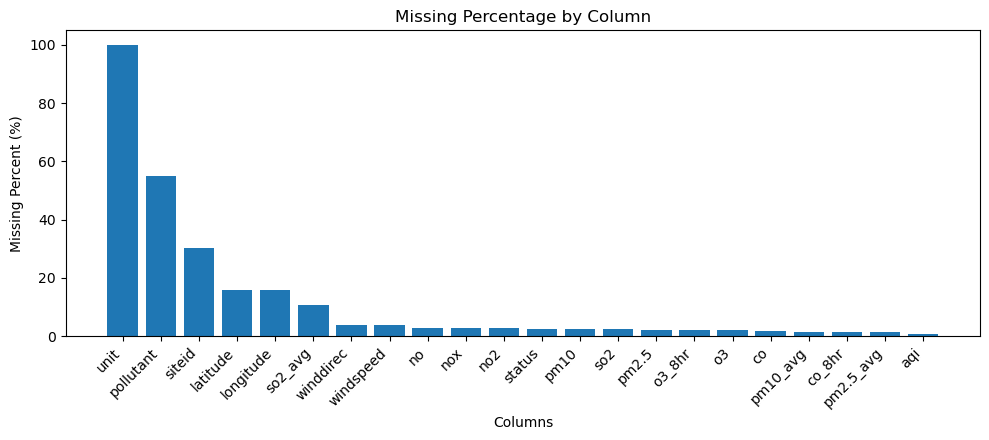

In [24]:
if len(missing_df_nonzero) > 0:
    plt.figure(figsize=(10, 4.5))
    plt.bar(missing_df_nonzero.index.astype(str), missing_df_nonzero["missing_percent (%)"])
    plt.title("Missing Percentage by Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing Percent (%)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values detected.")

Dựa trên báo cáo missing:

- Tập dữ liệu có **5,882,208 dòng** và **22/25 cột** có giá trị thiếu.
- Cột thiếu nhiều nhất:
  - **`unit`**: thiếu **100%** → nhiều khả năng **không mang thông tin hữu ích** hoặc đã bị bỏ trống toàn bộ trong nguồn dữ liệu.  
  - **`pollutant`**: thiếu khoảng **54.997%** → có thể do đây chỉ là nhãn “chất ô nhiễm chính chi phối AQI” tại thời điểm đo, nên ở nhiều bản ghi hệ thống không gán nhãn cụ thể.
  - **`siteid`**: thiếu khoảng **30.252%** → có thể do khác biệt chuẩn định danh trạm theo giai đoạn/nguồn cập nhật.
  - **`latitude`, `longitude`**: cùng thiếu khoảng **15.872%** → gợi ý một nhóm bản ghi có thể thiếu metadata vị trí trạm.

- Một số biến tổng hợp và khí tượng cũng thiếu đáng kể:
  - **`so2_avg` ~ 10.696%**
  - **`winddirec`, `windspeed` ~ 3.73%**
- Các biến ô nhiễm chính và AQI thiếu ở mức thấp hơn:
  - **`pm2.5`, `pm10`, `so2`, `o3`, `co`, `o3_8hr`** khoảng **1.9–2.4%**
  - **`aqi`** thiếu khoảng **0.731%**

Nhìn chung, mức thiếu của các biến đo lường chính là **không quá cao**, đủ tốt để tiếp tục phân tích nếu có chiến lược tiền xử lý phù hợp.

### 3.6.2. Preliminary Missing Patterns (Qualitative)

Từ mức độ thiếu dữ liệu, có thể suy đoán một số nguyên nhân hợp lý:

1. **Thiết bị đo không hoạt động / gián đoạn dữ liệu**  
   Các cảm biến đo khí tượng và một số chất ô nhiễm có thể bị lỗi theo thời điểm.

2. **Không phải trạm nào cũng đo đầy đủ tất cả chất**  
   Một số chỉ số tổng hợp (như `so2_avg`, `pm2.5_avg`, `pm10_avg`, `co_8hr`) có thể chỉ được tính khi đủ dữ liệu đầu vào.

3. **Thiếu metadata thay vì thiếu giá trị đo**  
   Trường hợp thiếu `latitude/longitude/siteid` có thể phản ánh dữ liệu được tổng hợp từ nhiều nguồn hoặc giai đoạn cập nhật khác nhau.

Các quan sát này sẽ được kiểm chứng sâu hơn ở các câu hỏi phân tích theo thời gian và theo khu vực ở các notebook sau.

### 3.6.3. Planned Strategy (To Be Implemented Later)

Ở bước preprocessing (notebook sau), chúng tôi dự kiến:

- **Nhóm cột nghi vấn không hữu ích**
  - `unit`: vì thiếu 100%, nhiều khả năng sẽ **loại bỏ**.

- **Nhóm nhãn mô tả**
  - `pollutant`, `status`:
    - Có thể **giữ lại** phục vụ phân tích mô tả/giải thích.
    - Nếu dùng cho ML, cân nhắc:
      - tạo nhãn “Unknown”, hoặc  
      - xử lý thiếu theo mục tiêu mô hình.

- **Nhóm biến đo lường chính**
  - `aqi`, `pm2.5`, `pm10`, `o3`, `no2`, `so2`, `co`:
    - Vì là biến trọng tâm, chiến lược xử lý sẽ phụ thuộc vào từng câu hỏi:
      - **drop theo hàng** khi thiếu ít và câu hỏi cần độ chính xác cao,
      - hoặc **impute** (median/mean theo trạm hoặc theo thời gian) nếu cần giữ tính liên tục.

- **Nhóm biến vị trí**
  - `latitude`, `longitude`, `siteid`:
    - Có thể **giữ lại** và xử lý bổ sung theo `sitename`/`county` nếu cần phân tích không gian.
    - Với các câu hỏi không dùng đến không gian, có thể **không cần xử lý sâu**.

Tóm lại, phần missing cho thấy dataset **đủ phức tạp và thực tế**, đồng thời cung cấp cơ sở rõ ràng để thiết kế các bước preprocessing phù hợp cho từng hướng phân tích/ML ở giai đoạn tiếp theo.

# 3.7 Relationships & Correlations

Mục tiêu của phần này là tìm những mối liên hệ ban đầu giữa **AQI** và các chất ô nhiễm/biến khí tượng, từ đó gợi ý hướng đặt câu hỏi phân tích và mô hình hóa sau này.  
Lưu ý: các kết quả dưới đây được tính trên **mẫu 200,000 dòng** và các cột số đã được **ép kiểu tạm thời** (không thay đổi pipeline tiền xử lý cuối cùng).

### 3.7.1 Chuẩn bị dữ liệu số tạm cho phân tích tương quan

In [25]:
corr_cols = [
    "aqi", "pm2.5", "pm10", "o3", "no2", "so2", "co",
    "o3_8hr", "co_8hr", "pm2.5_avg", "pm10_avg", "so2_avg",
    "nox", "no", "windspeed", "winddirec"
]

corr_cols = [c for c in corr_cols if c in df.columns]
df_tmp = df.copy()

for col in corr_cols:
    df_tmp[col] = pd.to_numeric(df_tmp[col], errors="coerce")

In [26]:
sample_size = 200_000

df_corr_base = df_tmp[corr_cols].dropna(how="all")

if len(df_corr_base) > sample_size:
    df_corr = df_corr_base.sample(sample_size, random_state=42)
else:
    df_corr = df_corr_base

print(f"Correlation/plot sample size: {len(df_corr):,}")
display(df_corr.head())

Correlation/plot sample size: 200,000


,aqi,pm2.5,pm10,o3,no2,so2,co,o3_8hr,co_8hr,pm2.5_avg,pm10_avg,so2_avg,nox,no,windspeed,winddirec
317089,53.0,14.0,24.0,30.4,7.0,1.4,0.26,41.1,0.2,16.2,25.0,1.0,8.2,1.2,1.4,241.0
5125838,41.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,0.1,11.0,44.0,NaN,NaN,NaN,NaN,NaN
5577721,49.0,12.0,40.0,15.0,5.9,3.3,0.16,21.0,0.3,15.0,47.0,NaN,11.0,4.7,5.3,200.0
1799205,119.0,39.0,54.0,47.8,32.7,1.3,0.56,59.0,0.5,42.0,71.0,1.0,32.7,0.0,0.3,263.0
3520342,28.0,12.0,NaN,28.7,2.2,2.2,0.18,30.0,0.1,8.0,NaN,1.0,3.7,1.5,2.4,178.0


Tập cột được chọn bao gồm AQI, các chất ô nhiễm chính, các biến tổng hợp 8 giờ/trung bình và gió:

- `aqi`, `pm2.5`, `pm10`, `o3`, `no2`, `so2`, `co`
- `o3_8hr`, `co_8hr`, `pm2.5_avg`, `pm10_avg`, `so2_avg`
- `nox`, `no`, `windspeed`, `winddirec`

Kết quả kiểm tra cho thấy tất cả các cột này đều tồn tại trong dữ liệu và đã được **ép kiểu numeric tạm thời** bằng `pd.to_numeric(errors="coerce")`.

Để giảm chi phí tính toán và tránh hiện tượng **overplotting** khi vẽ biểu đồ (đặc biệt scatter), nhóm sử dụng **mẫu ngẫu nhiên 200,000 dòng** cho heatmap và scatter. Với quy mô mẫu lớn, các mẫu hình tương quan mạnh (đặc biệt liên quan đến PM) vẫn phản ánh khá ổn định xu hướng chung của toàn bộ tập dữ liệu.

### 3.7.2 Ma trận tương quan & heatmap (trên sample)

In [27]:
corr_matrix = df_corr.corr(numeric_only=True)
display(corr_matrix)

,aqi,pm2.5,pm10,o3,no2,so2,co,o3_8hr,co_8hr,pm2.5_avg,pm10_avg,so2_avg,nox,no,windspeed,winddirec
aqi,1.000000,0.876444,0.777991,0.297891,0.353108,0.286490,0.354087,0.354068,0.401919,0.955358,0.856224,0.345694,0.226084,0.033125,-0.024114,0.088284
pm2.5,0.876444,1.000000,0.813899,0.170143,0.415107,0.322307,0.399000,0.173835,0.392958,0.917431,0.789812,0.332258,0.279693,0.064136,-0.085584,0.094588
pm10,0.777991,0.813899,1.000000,0.211457,0.362984,0.323826,0.342480,0.237434,0.337730,0.779150,0.913753,0.340972,0.249186,0.064557,0.029319,0.080277
o3,0.297891,0.170143,0.211457,1.000000,-0.273528,0.041365,-0.144582,0.738620,-0.038334,0.193466,0.207499,0.040691,-0.310119,-0.264561,0.354537,0.068611
no2,0.353108,0.415107,0.362984,-0.273528,1.000000,0.350873,0.781375,-0.121873,0.651112,0.376348,0.338993,0.288806,0.881184,0.526529,-0.275077,0.013531
so2,0.286490,0.322307,0.323826,0.041365,0.350873,1.000000,0.280515,0.010989,0.271196,0.298279,0.311107,0.635161,0.287687,0.146977,-0.005678,0.058573
co,0.354087,0.399000,0.342480,-0.144582,0.781375,0.280515,1.000000,-0.063855,0.760925,0.363671,0.317453,0.235860,0.856481,0.713796,-0.219860,0.022275
o3_8hr,0.354068,0.173835,0.237434,0.738620,-0.121873,0.010989,-0.063855,1.000000,-0.082457,0.207478,0.253670,0.049485,-0.213537,-0.274289,0.253542,-0.020213
co_8hr,0.401919,0.392958,0.337730,-0.038334,0.651112,0.271196,0.760925,-0.082457,1.000000,0.424408,0.371545,0.341860,0.682064,0.538451,-0.171277,0.039744
pm2.5_avg,0.955358,0.917431,0.779150,0.193466,0.376348,0.298279,0.363671,0.207478,0.424408,1.000000,0.858396,0.363150,0.243093,0.039218,-0.071219,0.101605


#### Heatmap correlation

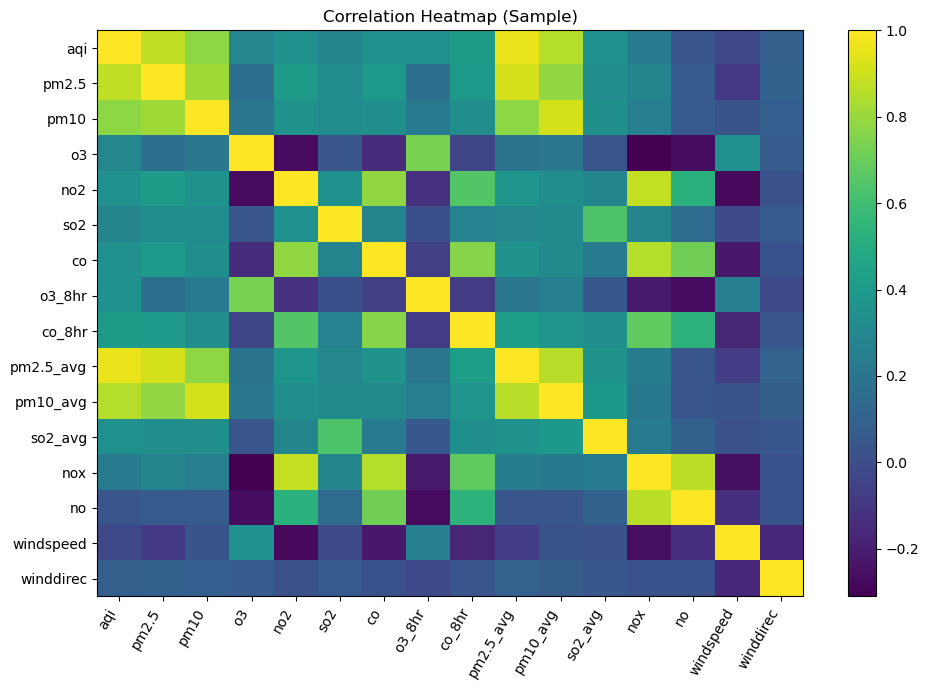

In [28]:
plt.figure(figsize=(10, 7))
plt.imshow(corr_matrix, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=60, ha="right")
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Correlation Heatmap (Sample)")
plt.tight_layout()
plt.show()

Dựa trên ma trận tương quan và heatmap:

- **AQI có tương quan mạnh nhất với các biến liên quan PM2.5**:
  - `aqi` – `pm2.5`: **r ≈ 0.876**
  - `aqi` – `pm2.5_avg`: **r ≈ 0.955**
- **PM10 cũng có mối liên hệ mạnh với AQI**:
  - `aqi` – `pm10`: **r ≈ 0.778**
  - `aqi` – `pm10_avg`: **r ≈ 0.856**
- **Ozone và NO2 có tương quan mức trung bình với AQI**:
  - `aqi` – `o3`: **r ≈ 0.298**
  - `aqi` – `no2`: **r ≈ 0.353**
- **CO có tương quan trung bình với AQI**:
  - `aqi` – `co`: **r ≈ 0.354**
  - `aqi` – `co_8hr`: **r ≈ 0.402**

Các kết quả này cho thấy **PM2.5 và PM10 là nhóm biến chi phối mạnh nhất** trong tín hiệu AQI của bộ dữ liệu.

Ngoài ra, heatmap cũng thể hiện một số quan hệ đáng chú ý giữa các chất ô nhiễm:
- `no2` có tương quan rất mạnh với `nox` (**r ≈ 0.881**) và với `co` (**r ≈ 0.781**), gợi ý cụm ô nhiễm **gắn với nguồn giao thông/đốt nhiên liệu**.
- `o3` có tương quan âm với `no2` và `nox` (ví dụ `o3` – `no2` **r ≈ -0.274**), phù hợp với đặc tính hóa học khí quyển (quan sát thăm dò, chưa kết luận nguyên nhân).



### 3.7.3.Scatter plots: AQI vs (PM2.5, PM10, O3)

In [29]:
scatter_targets = [c for c in ["pm2.5", "pm10", "o3"] if c in df_corr.columns]

def show_scatter(x_col):
    tmp = df_corr[["aqi", x_col]].dropna()
    plt.figure(figsize=(6.2, 4))
    plt.scatter(tmp[x_col], tmp["aqi"], s=6, alpha=0.3)
    plt.title(f"AQI vs {x_col} (Sample)")
    plt.xlabel(x_col)
    plt.ylabel("aqi")
    plt.tight_layout()
    plt.show()

for i in range(0, len(scatter_targets), 2):
    outs = []
    for col in scatter_targets[i:i+2]:
        out = Output()
        with out:
            show_scatter(col)
        outs.append(out)
    display(HBox(outs))

Quan sát các scatterplots:

- `AQI vs PM2.5` và `AQI vs PM10` cho thấy **xu hướng tăng rõ rệt**:  
  nồng độ bụi tăng đi kèm AQI tăng. Đám điểm tập trung tạo thành dạng “quạt mở” gợi ý mối quan hệ gần tuyến tính ở vùng giá trị phổ biến, nhưng có thể nhiễu ở các mức cực trị.

- `AQI vs O3` cho thấy **xu hướng yếu hơn** so với bụi mịn:  
  nhiều điểm phân tán rộng, phù hợp với việc ozone chịu ảnh hưởng mạnh bởi **quang hóa, thời điểm trong ngày và điều kiện khí tượng**.

### 3.7.4. Grouped stats: AQI trung bình theo county

,mean_aqi
county,
Kaohsiung City,66.743830
Chiayi City,65.775401
Kinmen County,65.085950
Chiayi County,62.794208
Lienchiang County,62.447049
Yunlin County,62.428586
Tainan City,61.855319
Nantou County,60.957194
Changhua County,57.052537


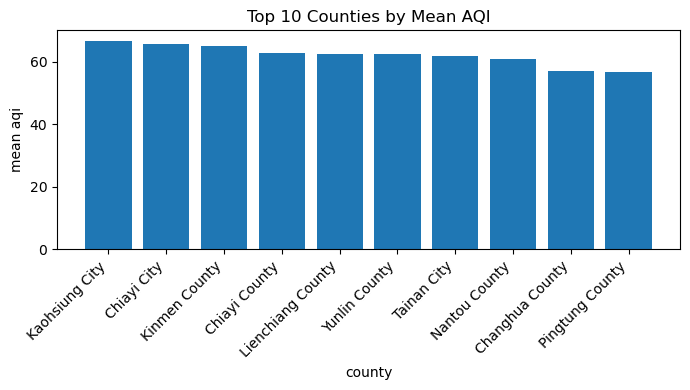

In [30]:
if "county" in df_tmp.columns:
    aqi_by_county = (
        df_tmp[["county", "aqi"]]
        .dropna(subset=["county"])
        .groupby("county")["aqi"]
        .mean()
        .sort_values(ascending=False)
    )
    
    display(aqi_by_county.head(15).to_frame("mean_aqi"))

    # Plot top 10 counties by mean AQI
    top_n = 10
    top_county_aqi = aqi_by_county.head(top_n)
    
    plt.figure(figsize=(7, 4))
    plt.bar(top_county_aqi.index.astype(str), top_county_aqi.values)
    plt.title(f"Top {top_n} Counties by Mean AQI")
    plt.xlabel("county")
    plt.ylabel("mean aqi")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'county' not found.")

Bảng mean AQI theo county cho thấy các khu vực có mức AQI trung bình cao đáng chú ý:

- **Kaohsiung City**: ~ **66.74**  
- **Chiayi City**: ~ **65.78**  
- **Kinmen County**: ~ **65.09**  
- **Chiayi County**: ~ **62.79**  
- **Lienchiang County**: ~ **62.45**  
- **Yunlin County**: ~ **62.43**  
- **Tainan City**: ~ **61.86**

Kết quả này gợi ý sự khác biệt không gian rõ rệt về mức độ ô nhiễm, có thể liên quan đến hoạt động công nghiệp, giao thông, điều kiện địa lý hoặc khí tượng địa phương.

### 3.7.5. Tần suất status theo county (nhìn nhanh mức độ ô nhiễm theo vùng)

In [31]:
if {"county", "status"}.issubset(df.columns):
    # Focus on top counties by record count for readability
    top_counties = df["county"].value_counts().head(8).index.tolist()
    
    sub = df[df["county"].isin(top_counties)][["county", "status"]].copy()
    
    # Count status
    status_ct = (
        sub.groupby(["county", "status"])
        .size()
        .reset_index(name="count")
    )
    
    # Pivot for display
    status_pivot = status_ct.pivot(index="county", columns="status", values="count").fillna(0).astype(int)
    display(status_pivot)

else:
    print("Columns 'county' and/or 'status' not found.")

status,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Groups,Very Unhealthy
county,,,,,,
Changhua County,141785,24,122167,2921,19271,12
Kaohsiung City,327381,0,401082,16939,108129,21
New Taipei City,580340,0,284377,1710,19856,2
Pingtung County,157801,0,108054,3078,26846,7
Taichung City,193238,0,145859,2219,17846,12
Tainan City,151640,0,163658,5861,34359,3
Taipei City,332443,0,154093,570,9010,0
Taoyuan City,272552,0,151073,2072,14923,11


Khi quan sát các county có số lượng bản ghi lớn nhất:

- **Kaohsiung City** có số lượng bản ghi thuộc nhóm:
  - `Moderate` và `Unhealthy for Sensitive Groups` cao hơn rõ rệt so với nhiều khu vực khác,  
  gợi ý mức độ ô nhiễm nền tương đối cao.
- **New Taipei City** và **Taipei City** có tỷ lệ `Good` lớn, nhưng vẫn có lượng `Moderate` đáng kể.
- Các county như **Tainan**, **Changhua**, **Pingtung** cho thấy phân bố `Moderate` và `Unhealthy for Sensitive Groups` khá nổi bật.

Đây là dấu hiệu sơ bộ cho thấy **mức độ ô nhiễm có tính vùng miền**, phù hợp để khai thác thêm trong các câu hỏi phân tích theo không gian.


### 3.7.6 Kết luận thăm dò & định hướng bước sau

Từ các kiểm tra tương quan, heatmap và scatter plots:

- **PM2.5 (và các biến tổng hợp liên quan) là nhóm biến có liên hệ mạnh nhất với AQI**.  
- **PM10 cũng đóng vai trò quan trọng**, nhưng mức liên hệ yếu hơn PM2.5.  
- **NO2, CO có tương quan trung bình**, gợi ý nhóm ô nhiễm liên quan giao thông/đốt nhiên liệu.  
- **O3 có mối quan hệ mức trung bình với AQI** và khá phân tán → có thể cần phân tích sâu theo **giờ/ngày/mùa**.

**Kế hoạch cho preprocessing/modeling:**
- Chuẩn hóa các ký hiệu bất thường (`-`, `ND`) về `NaN`,  
  xử lý các giá trị âm/sentinel đã phát hiện ở 3.4 trước khi tính correlation “final”.
- Ưu tiên xây dựng các câu hỏi/ mô hình tập trung vào:
  - Dự báo/giải thích AQI từ **PM2.5, PM10**  
  - So sánh “dấu vân tay ô nhiễm” theo **county/sitename**  
  - Phân tích biến động theo thời gian cho O3.

Mục 3.7 vì vậy đóng vai trò như một “bản đồ định hướng”, giúp xác định những biến và khu vực quan trọng nhất trước khi đi vào tiền xử lý và phân tích chuyên sâu.

# 3.8 Initial Observations, Issues & Red Flags

Mục này tổng kết nhanh những gì đã quan sát được từ 3.1–3.7, đồng thời ghi rõ các vấn đề dữ liệu và kế hoạch tiền xử lý sẽ thực hiện ở notebook 02.

#### (1) Key observations

1. **Quy mô dữ liệu lớn và giàu thông tin**  
   Tập dữ liệu gồm **5,882,208 dòng và 25 cột**, phản ánh dữ liệu chất lượng không khí theo giờ tại nhiều trạm quan trắc.

2. **Phủ thời gian dài**  
   Phạm vi thời gian (kiểm tra nhẹ) kéo dài từ **2016-11-25 13:00:00** đến **2024-08-31 23:00:00**.  
   Tỷ lệ `date` không parse được rất nhỏ (**85 dòng NaT**), cho thấy chất lượng cột thời gian nhìn chung ổn.

3. **Phủ không gian tương đối rộng**  
   Dữ liệu trải trên **22 county**, **123 sitename**, và **98 siteid** (theo thống kê ở 3.1).  
   Điều này đủ tốt để đặt các câu hỏi phân tích theo vùng hoặc theo trạm.

4. **AQI có liên hệ mạnh nhất với PM2.5/PM10**  
   Phần correlation cho thấy **PM2.5 và các biến tổng hợp của PM2.5** có tương quan rất mạnh với AQI,  
   trong khi **PM10** cũng thể hiện mối liên hệ đáng kể.  
   Đây là gợi ý quan trọng cho các câu hỏi phân tích và mô hình dự đoán sau này.

5. **Chênh lệch vùng miền có dấu hiệu rõ**  
   Mean AQI theo county cho thấy một số khu vực có mức AQI trung bình cao hơn đáng kể,  
   gợi ý sự khác biệt địa lý/nguồn phát thải cần được kiểm tra sâu ở các mục phân tích tiếp theo.

---

#### (2) Issues identified

1. **Sai kiểu dữ liệu ở nhiều cột số**  
   Nhiều cột lẽ ra là numeric đang bị đọc thành `object`.  
   Kiểm tra “strange values” cho thấy nguyên nhân phổ biến có thể là ký hiệu **`-`**  
   và riêng `pm2.5` còn xuất hiện **`ND`**.

2. **Giá trị âm/sentinel có thể tồn tại**  
   Thống kê mô tả cho thấy một số cột có **min = -999** hoặc giá trị âm không hợp lý  
   (gợi ý đây là **sentinel value** hoặc dữ liệu lỗi thiết bị).

3. **Thiếu dữ liệu đáng kể ở một số cột**  
   - `unit` **thiếu 100%** → khả năng không hữu ích.  
   - `pollutant` thiếu ~55%.  
   - `siteid` thiếu ~30%.  
   - `longitude/latitude` thiếu ~15.87%.  
   Điều này có thể ảnh hưởng đến các phân tích theo “pollutant dominant” hoặc theo site.

4. **Duplicate & toàn-NaN rows**  
   Theo kiểm tra ở 3.2, dữ liệu đã được đánh giá về **bản ghi trùng lặp** và **dòng toàn NaN**  
   để chuẩn bị chiến lược xử lý ở bước tiền xử lý (chưa thực thi trong notebook 01).

---

#### (3) Planned preprocessing (chuyển sang notebook 02)

Ở notebook preprocessing, nhóm sẽ:

1. **Chuẩn hóa dữ liệu thiếu/định dạng lỗi**  
   - Chuyển **`-` → NaN**.  
   - Với `pm2.5`, chuyển thêm **`ND` → NaN** (nếu xác nhận đây là “Not Detected”).

2. **Ép kiểu numeric**  
   Thực hiện `pd.to_numeric` cho các cột ô nhiễm và khí tượng  
   (`so2, co, o3, pm2.5, pm10, no2, nox, no, windspeed, winddirec, ...`).

3. **Chuẩn hóa thời gian**  
   - Đổi `date` sang `datetime`.  
   - Xử lý số ít giá trị không parse được.

4. **Xử lý trùng lặp**  
   - Thực hiện `drop_duplicates()` theo chiến lược phù hợp (toàn dòng hoặc theo khóa logic).

5. **Xem xét loại bỏ cột không hữu ích**  
   - `unit` gần như chắc chắn sẽ **drop** do thiếu 100%.

6. **Quy tắc xử lý giá trị âm/sentinel**  
   - Xác định rõ các giá trị như **`-999`** hoặc min âm bất hợp lý  
     và chuyển về `NaN` trước khi phân tích/mô hình hóa.

---

#### (4) Limitations / Red flags

1. **Mức độ phủ trạm không đồng đều theo county** Một số county có số bản ghi vượt trội so với phần còn lại →  có thể tạo **bias** nếu dùng trực tiếp для mô hình hoặc so sánh vùng.

2. **Thiếu dữ liệu ở `pollutant` và các biến liên quan site**  
   Việc `pollutant` thiếu cao có thể làm giảm độ tin cậy khi phân tích “pollutant dominant” hoặc gắn nhãn nguyên nhân ô nhiễm theo vùng.

3. **Tương quan hiện tại là kết quả EDA “thô”**  
   Vì chưa xử lý đầy đủ sentinel/giá trị âm và chuẩn hóa ký hiệu thiếu, các chỉ số correlation ở 3.7 nên được xem là **định hướng ban đầu**, sẽ cần xác nhận lại sau bước làm sạch ở notebook 02.

---

Tóm lại, dữ liệu có quy mô lớn, phủ thời gian dài và không gian rộng, với tín hiệu AQI liên hệ mạnh nhất với PM2.5/PM10.  
Tuy nhiên, các vấn đề về **missing, sai kiểu dữ liệu, và sentinel value** cần được xử lý cẩn thận ở notebook 02 để đảm bảo phân tích và mô hình hóa đáng tin cậy.